In [1]:
from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.labelling import DataLabellingSimple
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))


In [2]:
import fileutils as fileutils
listDataPath =os.listdir(fileutils.data_path)
symbols_listDataPath =[s for s in listDataPath if s.endswith('.L') or s.endswith('.I')]
fileutils.data_path


'/media/ak/DataOnly/FinDataReal/'

In [3]:
def get_files_for_ticker(ticker):
    """
    :return: Return all file names available for ticker, sort by name which is date
    """
    fin_data_dir = os.path.join("/media/ak/DataOnly",'Data') 
    total_path = os.path.join(fin_data_dir, ticker)
    # os.path.join(total_path, f)
    files_for_ticker = [f.split('.')[0] for f in os.listdir(total_path)
                        if (os.path.isfile(os.path.join(total_path, f)) and '.csv' in f and 'lock' not in f)]

    files_for_ticker.sort()
    return files_for_ticker

In [4]:
listofLabelsSymbols = os.listdir(fileutils.labels_path)
print("A bunch of symbols from the listdir above:",listofLabelsSymbols) 
LabelsPathsNames = ['Labels','LabelsAlternateOne','LabelsAlternateTwo','LabelsAlternateThree']

A bunch of symbols from the listdir above: ['EGS.L', 'SMIN.L', 'CRH.I', 'BLT.L', 'CNA.L', 'PRU.L', 'SHP.L', 'RTO.L', 'BATS.L', 'ULVR.L', 'RR.L', 'CPI.L', 'IEER.L', 'UU.L', 'RDSa.L', 'RSA.L', 'SPT.L', 'CEY.L', 'RB.L', 'TSCO.L', 'PSON.L', 'SDR.L', 'APF.L', 'STAN.L', 'REL.L', 'GKN.L', 'DMGOa.L', 'AZN.L', 'ECM.L', 'CCL.L', 'SGE.L', 'HSBA.L', 'RDSb.L', 'DGE.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L', 'VOD.L', 'RBS.L']


In [5]:
symbolsFirstLabels = os.listdir(fileutils.labels_path)
# for idx, symbol in enumerate(symbolsFirstLabels):
#     print(symbol)


In [6]:

index =10
nonDirectional = os.path.join(fileutils.labels_path, symbolsFirstLabels[index],'NON_DIRECTIONAL')

listofDates = os.listdir(nonDirectional)
sd = listofDates[0].split('.')[0]
ed = listofDates[-1].split('.')[0]

# fileIDX = 1
# pd.read_csv(os.path.join(nonDirectional,os.listdir(nonDirectional)[1]))
print(sd, ed, symbolsFirstLabels[index])

20180314 20180315 RR.L


In [7]:
cleanRawList =os.listdir(fileutils.clean_raw_data_path)
symbols_rawList =[s for s in cleanRawList if s.endswith('.L') or s.endswith('.I')]
# crh_folder = os.path.join(fileutils.clean_raw_data_path, 'CRH.I')
# pd.read_csv(os.path.join(crh_folder, os.listdir(crh_folder)[1]))

In [8]:

#os.listdir(os.path.join("/media/ak/DataOnly",'Data') )

In [9]:
symboldateslist=get_files_for_ticker('BARC.L')
#file= pd.read_csv(os.path.join(fileutils.clean_raw_data_path,'AV.L',symboldateslist[0]+'.csv'  ))

In [10]:
#os.listdir('/media/ak/DataOnly/Data/')

In [11]:
ticker = 'BARC.L'

sd = symboldateslist[0]
ed = symboldateslist[-1]

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
print(data.keys())


dict_keys(['20170116', '20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929'])


In [15]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)


labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window': 10,
#     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window': 5,
#     'updown_thrshd_vol_pct': 10.,
#     'trading_hours_filter': trading_hours_filter,
# },
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 10,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.05,
#     'threshold_method': ThresholdMethod.arbitrary},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 25,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0001,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0002,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 2,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.005,
    'threshold_method': ThresholdMethod.arbitrary,}
    ,
{
    'labelling_method': LabellingChoice.ep_in_window,
    'rolling_window': 9,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0008,
    'threshold_method': ThresholdMethod.arbitrary,},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 10,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0018}]



In [16]:
passport = '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateTwo/'
for ticker in listofLabelsSymbols:
    try:
        symboldateslist=get_files_for_ticker(str(ticker))
        print(ticker)
        sd = symboldateslist[0]
        ed = symboldateslist[-1]

        trading_hours_filter = TradingHours.only_mkt_hours

        data_loader = DataLoader(trading_hours_filter)

        data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
        for label_init in labelling_method_params:
            labeller = DataLabellingSimple(label_init)
            the_label = labeller.get_label_name()
            labeller.label_training_data(data)           
            filename = "".join((passport,ticker.split(".")[0],'_AlternateLabels.pickle'))
            with open(filename, 'wb') as handle:
                pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
                print(filename)

        print ("ok")
    except Exception:
        continue
    

CRH.I
BLT.L
CNA.L
PRU.L
BATS.L
CPI.L
CEY.L
APF.L
AZN.L
CCL.L
CPG.L
BARC.L
AV.L
AAL.L


In [14]:
# labeller = DataLabellingSimple(
#                     # Style of labelling method - Here we compare rolling 
#                     # inervals end points in absolute terms 
#                     labelling_method=LabellingChoice.price_move_in_window, 
#                     # Window for labelling method= Number of look ahead trades that control up /down move
#                     rolling_window=5,
#                     # Calculate threshold by means of moving average historical vol
#                     thrshd_method=ThresholdMethod.historical_vol_ma,
#                     # Use the last 5 days for the above average. 
#                     thrshd_vol_window=5,
#                     # Pct of historical vol to use for threshold, i.e. 0.1 * historical vol
#                     updown_thrshd_vol_pct=10.)

In [15]:
# labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window_': np.int(100),
# #     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window_': 0.1,
#     'updown_thrshd_vol_pct_': 10.,
#     'trading_hours_filter_': trading_hours_filter,
# }]

In [16]:
DataLabellingSimple?

In [17]:
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)

print ("ok")

ok


In [42]:
# import pickle
# passport = '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/'
# filename = "".join((passport,ticker.split(".")[0],'_AlternateLabels.pickle'))
# with open(filename, 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
# filename

'/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/BARC_AlternateLabels.pickle'

In [18]:
df = data[list(data.keys())[3]]
differentLabelTypes=df.filter(like='label', axis=1).columns.values
differentLabelTypes

array(['label_MovAv__window_25__thres_arbitrary__0.0',
       'label_MovAv__window_15__thres_arbitrary__0.0',
       'label_PrMov__window_2__thres_arbitrary__0.5',
       'label_EndPo__window_9__thres_arbitrary__0.1',
       'label_MovAv__window_10__thres_arbitrary__0.2'], dtype=object)

In [20]:
for key in list(data.keys()):
    print(key)
    df = data[key]
    differentLabelTypes=df.filter(like='label', axis=1).columns.values
    print(str(differentLabelTypes[0]))
    print(df[differentLabelTypes[0]].value_counts())
    print('----------------------***-----------------')
    print(str(differentLabelTypes[1]))
    print(df[differentLabelTypes[1]].value_counts())    
    print('----------------------')

20170116
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    2365
 1.0    2300
 0.0     717
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_15__thres_arbitrary__0.0
-1.0    1903
 1.0    1861
 0.0    1628
Name: label_MovAv__window_15__thres_arbitrary__0.0, dtype: int64
----------------------
20170117
label_MovAv__window_25__thres_arbitrary__0.0
-1.0    2648
 1.0    2442
 0.0     651
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_15__thres_arbitrary__0.0
-1.0    2054
 1.0    1940
 0.0    1757
Name: label_MovAv__window_15__thres_arbitrary__0.0, dtype: int64
----------------------
20170118
label_MovAv__window_25__thres_arbitrary__0.0
 1.0    2831
-1.0    2486
 0.0     860
Name: label_MovAv__window_25__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_15__thres_arbitrary__0.0
 1.0    

In [19]:
# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)

In [20]:
# for dataKey in list(data.keys()):
    

In [21]:
#df[differentLabelTypes[0]].value_counts()#[1]/df[differentLabelTypes[1]].value_counts()[0]

In [22]:
keys=list(data.keys())
from collections import defaultdict
labelsDict = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    print(differentLabelTypes)
    print(differentLabelTypes.shape[0])
    for i in range(differentLabelTypes.shape[0]):
        print(i)
        try:
            print(key)
            labelsDict[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[1]/df[differentLabelTypes[i]].value_counts()[0]
        except:
            print('continuing')
            continue
    


['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170116
1
20170116
2
20170116
continuing
3
20170116
4
20170116
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170117
1
20170117
2
20170117
3
20170117
4
20170117
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170118
1
20170118
2
20170118
3
20170118
4
20170118
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'lab

3
20170817
4
20170817
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170818
1
20170818
2
20170818
3
20170818
4
20170818
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170821
1
20170821
2
20170821
continuing
3
20170821
4
20170821
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_EndPo__window_9__thres_arbitrary__0.1'
 'label_MovAv__window_10__thres_arbitrary__0.2']
5
0
20170822
1
20170822
2
20170822
3
20170822
4
20170822
['label_MovAv__window_25__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres

In [23]:
labelsDict.keys()

dict_keys(['label_MovAv__window_25__thres_arbitrary__0.0', 'label_MovAv__window_15__thres_arbitrary__0.0', 'label_EndPo__window_9__thres_arbitrary__0.1', 'label_MovAv__window_10__thres_arbitrary__0.2', 'label_PrMov__window_2__thres_arbitrary__0.5'])

['label_EndPo__window_9__thres_arbitrary__0.1']


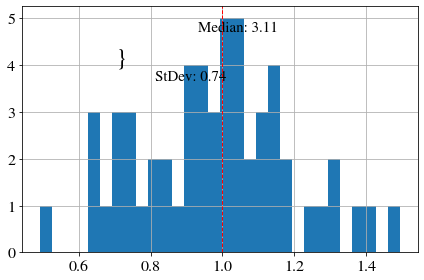

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
balanceKeys = labelsDict.keys()

df.from_dict(labelsDict)[differentLabelTypes[1]].hist(bins=30)
plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
x= df.from_dict(labelsDict)[differentLabelTypes[0]]
print([differentLabelTypes[3]])
min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*0.3, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
plt.annotate(r"$\}$",fontsize=24,
            xy=(0.27, 0.77), xycoords='figure fraction'
            )
plt.show()

# df.from_dict(labelsDict)[differentLabelTypes[2]].hist(bins=30)
# plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[2]].median(), color='r', linestyle='dashed', linewidth=1)
# x= df.from_dict(labelsDict)[differentLabelTypes[2]]
# print([differentLabelTypes[4]])
# min_ylim, max_ylim = plt.ylim()
# plt.text(x.mean()*1.4, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
# plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()))
# plt.show()

In [40]:
tests = df.from_dict(labelsDict)
#g = sns.FacetGrid(tests)
#sns.load_dataset("tips")
testsDF = tests.reset_index().rename(columns={"index": "Date"})
testsDF.head(5)

,Date,label_MovAv__window_25__thres_arbitrary__0.0,label_MovAv__window_15__thres_arbitrary__0.0,label_EndPo__window_9__thres_arbitrary__0.1,label_MovAv__window_10__thres_arbitrary__0.2,label_PrMov__window_2__thres_arbitrary__0.5
0,20170116,3.207810,1.143120,0.144518,0.004111,NaN
1,20170117,3.751152,1.104155,0.101877,0.004728,0.000347
2,20170118,3.291860,1.173665,0.106507,0.001136,0.000969
3,20170119,3.261218,1.031726,0.087581,0.001962,0.000780
4,20170120,2.466729,0.845248,0.058834,0.001245,0.000310


In [41]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=False, bins=20)
    _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)))
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(x.std()*0.5, max_ylim*0.1, 'StDev: {:.2f}'.format(x.std()))
    plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


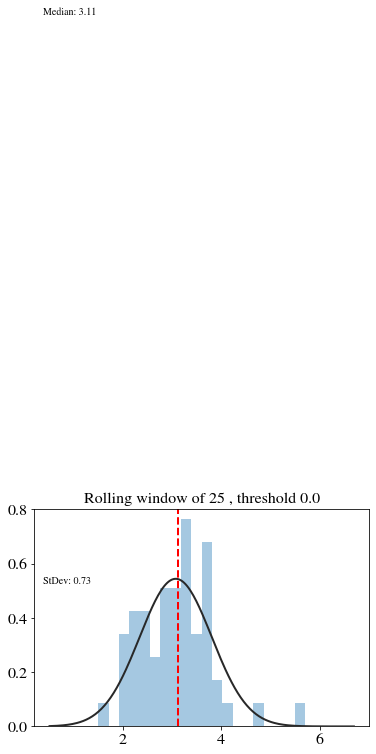

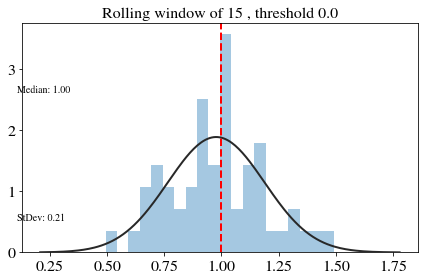

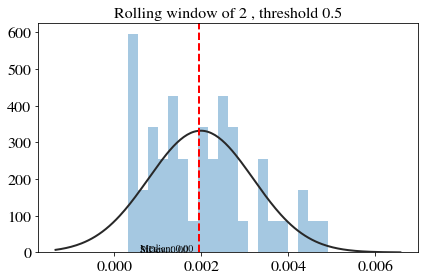

In [42]:
for i in range(0,3):
    x= df.from_dict(labelsDict)[differentLabelTypes[i]]
    price_based_histogram_labels(x, labelText= differentLabelTypes[i])

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


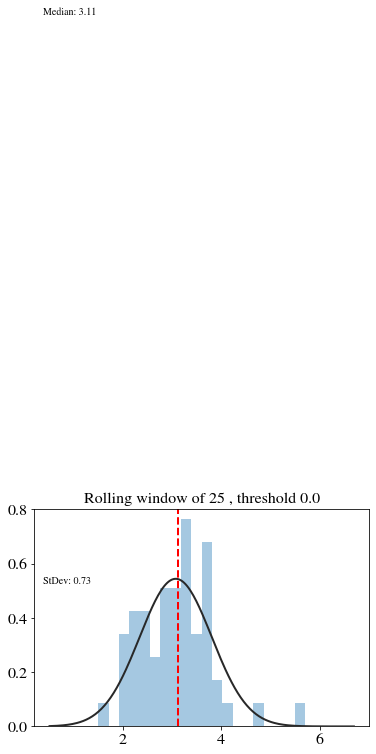

In [43]:
i=0
x= df.from_dict(labelsDict)[differentLabelTypes[i]]
price_based_histogram_labels(x, labelText= differentLabelTypes[i])

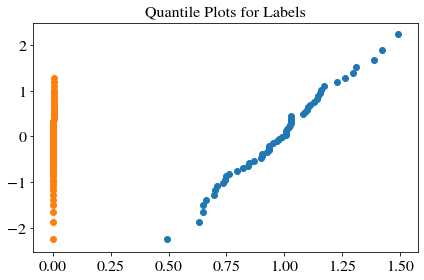

In [44]:
from scipy import stats
x2= df.from_dict(labelsDict)[differentLabelTypes[2]]
x1= df.from_dict(labelsDict)[differentLabelTypes[1]]
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)
    
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

quantile_plot(x1)
quantile_plot(x2)
_=plt.title('Quantile Plots for Labels')
#todo add legends and a 45% degree line

In [48]:
labels =testsDF.filter(like='label', axis=1).columns.values


In [59]:
dfs = []
for label, _ in enumerate(labels):
    df1 = testsDF[['Date', labels[label]]]
    df1Clean = pd.DataFrame()

    df1Clean['Date'] = df1['Date']
    df1Clean['LabelValue'] = df1[labels[label]]
    df1Clean['LabelType'] = 'Label '+str(label)
    dfs.append(df1Clean)

In [68]:
dfsConcat = pd.concat(dfs,axis =0)
dfsConcat.columns.values

array(['Date', 'LabelValue', 'LabelType'], dtype=object)

In [85]:
df1 = testsDF[['Date', labels[0]]]
df1Clean = pd.DataFrame()

df1Clean['Date'] = df1['Date']
df1Clean['LabelValue'] = df1[labels[0]]
df1Clean['LabelType'] = 'Label1'

df2 = testsDF[['Date', labels[1]]]
df2Clean = pd.DataFrame()

df2Clean['Date'] = df1['Date']
df2Clean['LabelValue'] = df2[labels[1]]
df2Clean['LabelType'] = 'Label2'

df3 = testsDF[['Date', labels[2]]]
df3Clean = pd.DataFrame()

df3Clean['Date'] = df3['Date']
df3Clean['LabelValue'] = df3[labels[2]]
df3Clean['LabelType'] = 'Label3'

df4 = testsDF[['Date', labels[4]]]
df4Clean = pd.DataFrame()

df4Clean['Date'] = df4['Date']
df4Clean['LabelValue'] = df4[labels[4]]
df4Clean['LabelType'] = 'Label4'

df= pd.concat([df1Clean, df2Clean, df3Clean], axis=0)
#df2= pd.concat([df3Clean, df4Clean], axis=0)


In [93]:
df

,Date,LabelValue,LabelType
0,20170116,3.207810,Label1
1,20170117,3.751152,Label1
2,20170118,3.291860,Label1
3,20170119,3.261218,Label1
4,20170120,2.466729,Label1
5,20170123,3.390432,Label1
6,20170124,3.436523,Label1
7,20170125,3.708779,Label1
8,20170126,3.600688,Label1
9,20170127,3.808065,Label1


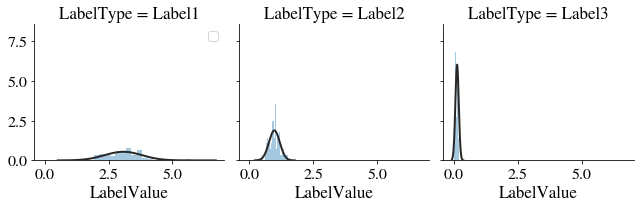

In [92]:

g = sns.FacetGrid(df, col="LabelType",legend_out=False)
_=g.map(sns.distplot, "LabelValue", bins=20,fit=norm, kde=False)
g.add_legend()

In [ ]:
# differentLabelTypes =test_df.filter(like='label', axis=1).columns.values

# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


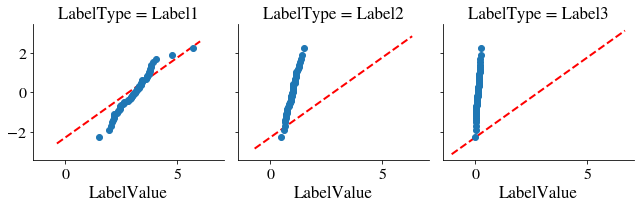

In [88]:
g = sns.FacetGrid(df, col="LabelType",legend_out=False)
g.map(quantile_plot, "LabelValue")
plt.legend([],[], frameon=False)
# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
# 
# ax.set_prop_cycle(color=['red', 'green', 'blue'])
axes = g.fig.axes

for ax in axes:
    x = np.linspace(*ax.get_xlim())#*1.09
    y = np.linspace(*ax.get_ylim())#*1.09
    ax.plot(x, y,c="red", ls="--",zorder=0)
    ax. legend(loc='upper left', frameon=False) 
    

plt.show()

# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)